In [5]:
 pip install apyori

  Using cached apyori-1.1.2.tar.gz (8.6 kB)
  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Running setup.py install for apyori: started
  Running setup.py install for apyori: finished with status 'done'
Note: you may need to restart the kernel to use updated packages.


  DEPRECATION: apyori is being installed using the legacy 'setup.py install' method, because it does not have a 'pyproject.toml' and the 'wheel' package is not installed. pip 23.1 will enforce this behaviour change. A possible replacement is to enable the '--use-pep517' option. Discussion can be found at https://github.com/pypa/pip/issues/8559

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [6]:
import pandas as pd
from apyori import apriori

In [7]:
df=pd.read_csv("C:\\Users\\BIDISHA HALDAR\\Desktop\\Different datasets\\online_retail_II.csv")
df.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 525461 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      525461 non-null  object 
 1   StockCode    525461 non-null  object 
 2   Description  522533 non-null  object 
 3   Quantity     525461 non-null  int64  
 4   InvoiceDate  525461 non-null  object 
 5   Price        525461 non-null  float64
 6   Customer ID  417534 non-null  float64
 7   Country      525461 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 32.1+ MB


In [9]:
df.isnull().sum()

Invoice             0
StockCode           0
Description      2928
Quantity            0
InvoiceDate         0
Price               0
Customer ID    107927
Country             0
dtype: int64

In [10]:
df.describe()

,Quantity,Price,Customer ID
count,525461.000000,525461.000000,417534.000000
mean,10.337667,4.688834,15360.645478
std,107.424110,146.126914,1680.811316
min,-9600.000000,-53594.360000,12346.000000
25%,1.000000,1.250000,13983.000000
50%,3.000000,2.100000,15311.000000
75%,10.000000,4.210000,16799.000000
max,19152.000000,25111.090000,18287.000000


In [11]:
df.shape

(525461, 8)

In [12]:
new=df[df['Invoice'].str.startswith('C')]
new.head()

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
178,C489449,22087,PAPER BUNTING WHITE LACE,-12,12/1/2009 10:33,2.95,16321.0,Australia
179,C489449,85206A,CREAM FELT EASTER EGG BASKET,-6,12/1/2009 10:33,1.65,16321.0,Australia
180,C489449,21895,POTTING SHED SOW 'N' GROW SET,-4,12/1/2009 10:33,4.25,16321.0,Australia
181,C489449,21896,POTTING SHED TWINE,-6,12/1/2009 10:33,2.10,16321.0,Australia
182,C489449,22083,PAPER CHAIN KIT RETRO SPOT,-12,12/1/2009 10:33,2.95,16321.0,Australia


In [13]:
df[df['Invoice'].str.startswith('A', na=False)]

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
179403,A506401,B,Adjust bad debt,1,4/29/2010 13:36,-53594.36,NaN,United Kingdom
276274,A516228,B,Adjust bad debt,1,7/19/2010 11:24,-44031.79,NaN,United Kingdom
403472,A528059,B,Adjust bad debt,1,10/20/2010 12:04,-38925.87,NaN,United Kingdom


In [14]:
not_canceled_data = df[~ df['Invoice'].str.startswith('C', na=False)]
not_canceled_data.head(15)

,Invoice,StockCode,Description,Quantity,InvoiceDate,Price,Customer ID,Country
0,489434,85048,15CM CHRISTMAS GLASS BALL 20 LIGHTS,12,12/1/2009 7:45,6.95,13085.0,United Kingdom
1,489434,79323P,PINK CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
2,489434,79323W,WHITE CHERRY LIGHTS,12,12/1/2009 7:45,6.75,13085.0,United Kingdom
3,489434,22041,"RECORD FRAME 7"" SINGLE SIZE",48,12/1/2009 7:45,2.10,13085.0,United Kingdom
4,489434,21232,STRAWBERRY CERAMIC TRINKET BOX,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
5,489434,22064,PINK DOUGHNUT TRINKET POT,24,12/1/2009 7:45,1.65,13085.0,United Kingdom
6,489434,21871,SAVE THE PLANET MUG,24,12/1/2009 7:45,1.25,13085.0,United Kingdom
7,489434,21523,FANCY FONT HOME SWEET HOME DOORMAT,10,12/1/2009 7:45,5.95,13085.0,United Kingdom
8,489435,22350,CAT BOWL,12,12/1/2009 7:46,2.55,13085.0,United Kingdom
9,489435,22349,"DOG BOWL , CHASING BALL DESIGN",12,12/1/2009 7:46,3.75,13085.0,United Kingdom


In [15]:
not_canceled_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 515255 entries, 0 to 525460
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   Invoice      515255 non-null  object 
 1   StockCode    515255 non-null  object 
 2   Description  512327 non-null  object 
 3   Quantity     515255 non-null  int64  
 4   InvoiceDate  515255 non-null  object 
 5   Price        515255 non-null  float64
 6   Customer ID  407695 non-null  float64
 7   Country      515255 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 35.4+ MB


In [16]:
not_canceled_data.shape

(515255, 8)

In [17]:
countrybase_retail = not_canceled_data.groupby(['Country']).agg(
                     InvoiceCount = ('Invoice', 'count'),
                     QuantityCount = ('Quantity', 'count'),
                     TotalPrice = ('Price', 'sum'),
                     Customers = ('Customer ID', 'count')).reset_index()

In [18]:
countrybase_retail.sort_values('TotalPrice', ascending=False,
                               inplace=True, ignore_index=True)

In [19]:
countrybase_retail

,Country,InvoiceCount,QuantityCount,TotalPrice,Customers
0,United Kingdom,477058,477058,1850082.783,370951
1,EIRE,9460,9460,56118.240,8507
2,Germany,7661,7661,26487.111,7661
3,France,5532,5532,22269.680,5470
4,Norway,365,365,14736.240,365
5,Netherlands,2730,2730,7424.490,2730
6,Spain,1235,1235,6276.830,1235
7,Belgium,1038,1038,5631.830,1038
8,Switzerland,1170,1170,5140.850,1170
9,Sweden,887,887,4869.990,868


In [23]:
pip install matplotlib

     ---------------------------------------- 7.7/7.7 MB 2.7 MB/s eta 0:00:00
     -------------------------------------- 188.2/188.2 kB 3.9 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 3.4 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 2.9 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 kB 5.8 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


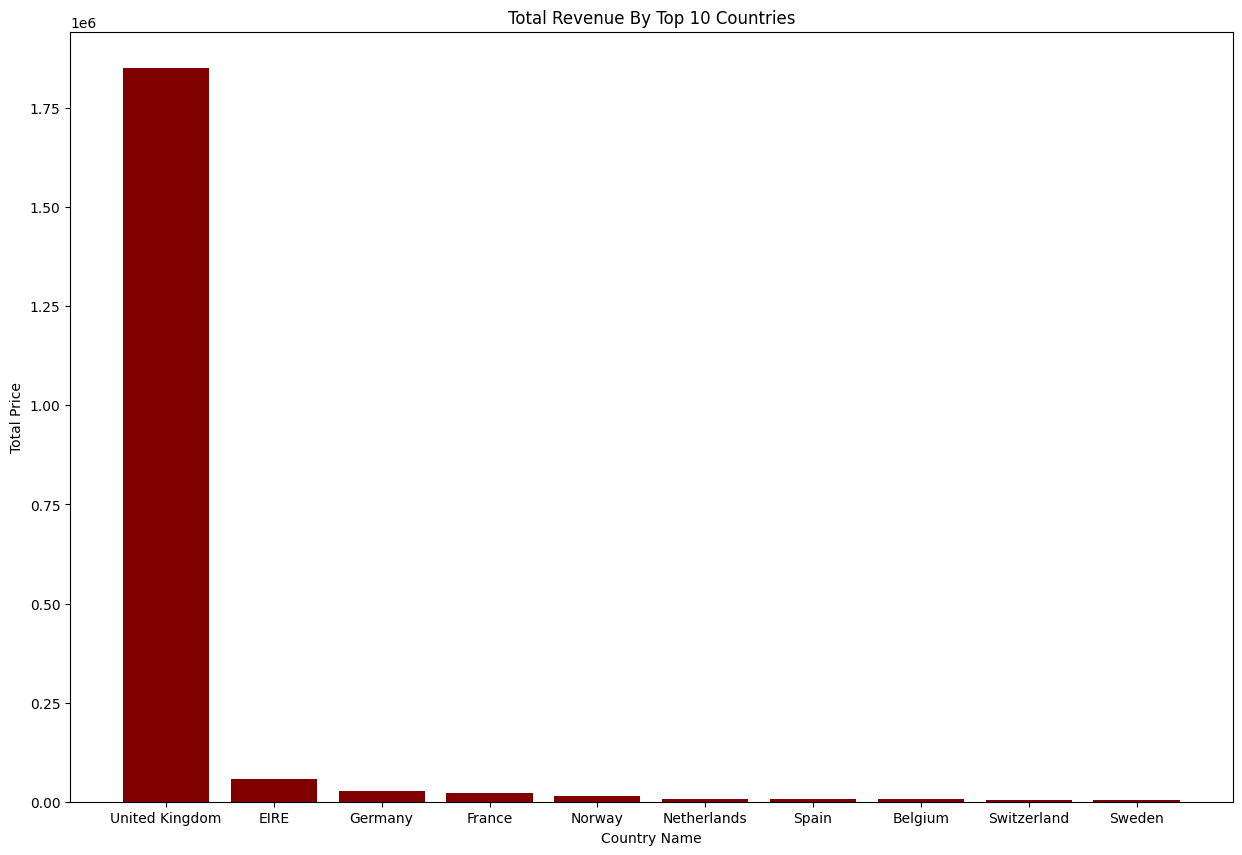

In [24]:
import matplotlib.pyplot as plt
fig = plt.figure(figsize = (15, 10))

plt.bar(countrybase_retail['Country'].head(10), countrybase_retail['TotalPrice'].head(10),
        color ='maroon')

plt.xlabel("Country Name")
plt.ylabel("Total Price")
plt.title("Total Revenue By Top 10 Countries")
plt.show()

In [25]:
not_canceled_data['StockCode'].value_counts()

StockCode
85123A    3423
22423     2055
85099B    2015
21212     1920
21232     1714
          ... 
90080        1
20904        1
79157B       1
72331R       1
21120        1
Name: count, Length: 4627, dtype: int64

In [26]:
not_canceled_data['Description'].value_counts()

Description
WHITE HANGING HEART T-LIGHT HOLDER    3456
REGENCY CAKESTAND 3 TIER              2046
STRAWBERRY CERAMIC TRINKET BOX        1714
PACK OF 72 RETRO SPOT CAKE CASES      1456
ASSORTED COLOUR BIRD ORNAMENT         1450
                                      ... 
LARGE HANGING GLASS+ZINC LANTERN         1
Dotcomgiftshop Gift Voucher £80.00       1
17129c                                   1
bad quality                              1
entry error                              1
Name: count, Length: 4666, dtype: int64

In [27]:
# Delete null values and change the type of 'Description' to string
not_canceled_data = not_canceled_data[~ not_canceled_data['Description'].isna()]
not_canceled_data['Description'] = not_canceled_data['Description'].astype(str)

In [28]:
gb_retail_data = not_canceled_data.groupby(['Invoice'])['Description'].apply(list).to_frame().reset_index()

In [29]:
gb_retail_data

,Invoice,Description
0,489434,"[15CM CHRISTMAS GLASS BALL 20 LIGHTS, PINK CHE..."
1,489435,"[CAT BOWL , DOG BOWL , CHASING BALL DESIGN, HE..."
2,489436,"[DOOR MAT BLACK FLOCK , LOVE BUILDING BLOCK WO..."
3,489437,"[CHRISTMAS CRAFT HEART DECORATIONS, CHRISTMAS ..."
4,489438,"[DINOSAURS WRITING SET , SET OF MEADOW FLOWE..."
...,...,...
21291,538170,"[ASSORTED COLOUR BIRD ORNAMENT, HAND WARMER BA..."
21292,538171,"[3 TIER SWEETHEART GARDEN SHELF, FIRST AID TIN..."
21293,A506401,[Adjust bad debt]
21294,A516228,[Adjust bad debt]


In [30]:
transactions = gb_retail_data['Description'].to_list()

In [31]:
association_rules = apriori(transactions,
                            min_support=0.01,
                            min_confidence=0.2,
                            min_lift=2,
                            min_length=4)

In [32]:
rules = list(association_rules)
print(len(rules))

338


In [33]:
number = 1
result_file = open('Rules.txt', 'w')

for rule in rules:
    pair = rule[0]
    items = [x for x in pair]

    result_file.write("Rule #{}".format(number) + "\n")
    result_file.write("Antecedent: {} => Consequent: {}".format(items[0], items[1]) + "\n")
    result_file.write("Support: {}".format(str(rule[1])) + "\n")
    result_file.write("Confidence: {}".format(str(rule[2][0][2])) + "\n")
    result_file.write("Lift: {}".format(str(rule[2][0][3])) + "\n")
    result_file.write("====================================================="+"\n")

    print("Rule #{}".format(number))
    print("Antecedent: {} => Consequent: {}".format(items[0], items[1]))
    print("Support: {}".format(str(rule[1])))
    print("Confidence: {}".format(str(rule[2][0][2])))
    print("Lift: {}".format(str(rule[2][0][3])))
    print("=====================================================")
    number += 1

result_file.close()

Rule #1
Antecedent: 6 RIBBONS RUSTIC CHARM => Consequent: REGENCY CAKESTAND 3 TIER
Support: 0.01047145003756574
Confidence: 0.2667464114832536
Lift: 2.812193850964044
Rule #2
Antecedent: 60 CAKE CASES VINTAGE CHRISTMAS => Consequent: PAPER CHAIN KIT VINTAGE CHRISTMAS
Support: 0.010236664162283996
Confidence: 0.461864406779661
Lift: 14.27556517674842
Rule #3
Antecedent: 60 CAKE CASES VINTAGE CHRISTMAS => Consequent: SET OF 20 VINTAGE CHRISTMAS NAPKINS
Support: 0.01117580766341097
Confidence: 0.5042372881355932
Lift: 20.222669092534073
Rule #4
Antecedent: 72 SWEETHEART FAIRY CAKE CASES => Consequent: 60 TEATIME FAIRY CAKE CASES
Support: 0.022163786626596543
Confidence: 0.3532934131736527
Lift: 8.638044233003567
Rule #5
Antecedent: PACK OF 60 DINOSAUR CAKE CASES => Consequent: 60 TEATIME FAIRY CAKE CASES
Support: 0.019675056348610068
Confidence: 0.313622754491018
Lift: 9.354215937872155
Rule #6
Antecedent: PACK OF 60 MUSHROOM CAKE CASES => Consequent: 60 TEATIME FAIRY CAKE CASES
Support: 